# 聚类
- 用户画像，广告推荐，Data Segmentation，搜索引擎的流量推荐，恶意流量识别

- 基于位置信息的商业推送，新闻聚类，筛选排序

- 图像分割，降维，识别；离群点检测；信用卡异常消费；发掘相同功能的基因片段

- 一种典型的无监督学习算法，主要用于将相似的样本自动归到一个类别中

![avatar](../source/119.jpg) 

- 聚类和分类的区别?
    - 聚类算法是无监督的学习算法，而分类算法属于监督的学习算法。
    
## API
- sklearn.cluster.KMeans(n_clusters=8)
    - n_clusters:开始的聚类中心数量,整型，缺省值=8，生成的聚类数，即产生的质心（centroids）数。

    - estimator.fit(x)
    - estimator.predict(x)
    - estimator.fit_predict(x)
        - 聚类是无监督学习,所有没有 label,一般都是直接调用fit_predict得到结果
        
## 案例
随机创建不同二维数据集作为训练集，并结合k-means算法将其聚类，你可以尝试分别聚类不同数量的簇，并观察聚类效果：

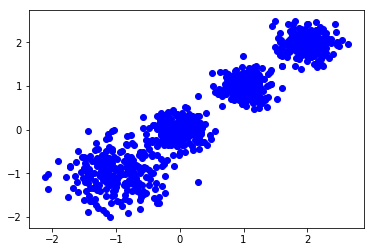

In [11]:
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
# from sklearn.metrics import calinski_harabaz_score
from sklearn.metrics import calinski_harabasz_score

# 创建数据集
# X为样本特征，Y为样本簇类别， 共1000个样本，每个样本2个特征，共4个簇，
# 簇中心在[-1,-1], [0,0],[1,1], [2,2]， 簇方差分别为[0.4, 0.2, 0.2, 0.2],这个值越大,点越分散
X, y = make_blobs(n_samples=1000, n_features=2, centers=[[-1, -1], [0, 0], [1, 1], [2, 2]],
                  cluster_std=[0.4, 0.2, 0.2, 0.2],
                  random_state=9)

# 数据集可视化
plt.scatter(X[:, 0], X[:, 1], marker='o', color='b')
plt.show()

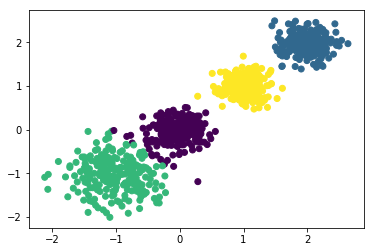

5924.050613480169


In [13]:
y_pred = KMeans(n_clusters=4, random_state=9).fit_predict(X)
# 分别尝试n_cluses=2\3\4,然后查看聚类效果
plt.scatter(X[:, 0], X[:, 1], c=y_pred)
plt.show()

# 用Calinski-Harabasz Index评估的聚类分数,这个值越大,分类效果越好
print(calinski_harabasz_score(X, y_pred))

## kmeans 原理
- k-means其实包含两层内容：
    - K : 初始中心点个数（计划聚类数）
    - means：求中心点到其他数据点距离的平均值
    
    
- k-means聚类步骤
    - 1、随机设置K个特征空间内的点作为初始的聚类中心
    - 2、对于其他每个点计算到K个中心的距离，未知的点选择最近的一个聚类中心点作为标记类别
    - 3、接着对着标记的聚类中心之后，重新计算出每个聚类的新中心点（平均值）
    - 4、如果计算得出的新中心点与原中心点一样（质心不再移动），那么结束，否则重新进行第二步过程
![avatar](../source/120.jpg)  


## 案例分析
![avatar](../source/121.jpg)  
![avatar](../source/122.jpg)  
![avatar](../source/123.jpg)  
![avatar](../source/124.jpg)  
    

## kmeans 小节
- K-means聚类实现流程【掌握】
    - 事先确定常数K，常数K意味着最终的聚类类别数;
    - 随机选定初始点为质心，并通过计算每一个样本与质心之间的相似度(这里为欧式距离)，将样本点归到最相似的类中，
    - 接着，重新计算每个类的质心(即为类中心)，重复这样的过程，直到质心不再改变，
    - 最终就确定了每个样本所属的类别以及每个类的质心。
- 注意:
    - 由于每次都要计算所有的样本与每一个质心之间的相似度，故在大规模的数据集上，K-Means算法的收敛速度比较慢。